In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

feature_bow = pickle.load(open("model/feature-bow.p",'rb'))
model_nb = pickle.load(open('model/model-nb.p', 'rb'))
model_nn = pickle.load(open('model/model-nn.p', 'rb'))

c:\Users\Alif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Alif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Alif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Try

In [3]:
text = pd.read_csv('data/data_crawling_cleaned.csv', sep=",")

def predict_sentiment(sent):
    # feature extraction
    text_feature = feature_bow.transform([sent])
    # predict
    return model_nb.predict(text_feature)[0]

In [4]:
text['sentiment'] = text.full_text.apply(predict_sentiment)
text

,full_text,sentiment
0,timnas bahrain harusnya malu sih karena media ...,negative
1,bahrain have a lot of money but don t have a ...,negative
2,kalender timnas indonesia di tahun 2024 oktob...,neutral
3,gassss yang mau nobar indonesia vs bahrain kam...,neutral
4,netijen indonesia paling sering ribut dgn neti...,negative
...,...,...
622,tentukan nasib timnas indonesia ini prediksi y...,neutral
623,timnas indonesia vs bahrain dan china kapan di...,neutral
624,jadwal leg 2 siaran langsung timnas indonesia ...,neutral
625,link live streaming timnas indonesia putri vs ...,positive


In [ ]:
# Simpan DataFrame yang telah dibersihkan (opsional)
text.to_csv('data_crawling_label.csv', index=False)

In [69]:
view = pd.read_csv('data/data_crawling_label.csv')
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  627 non-null    object
 1   sentiment  627 non-null    object
dtypes: object(2)
memory usage: 9.9+ KB


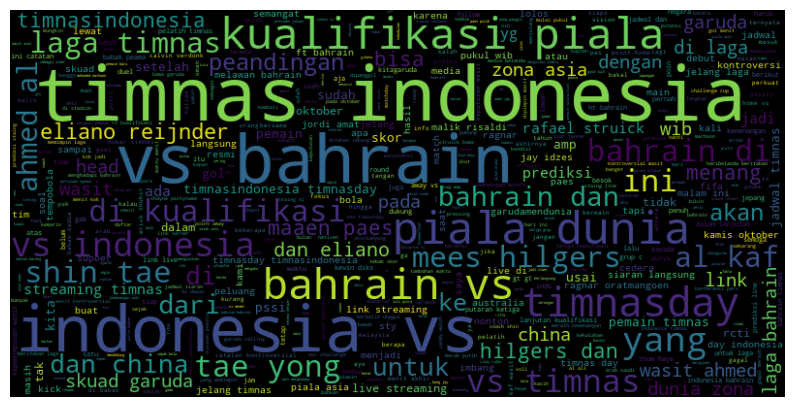

In [80]:
data_text = ' '.join(view['full_text'].astype(str).tolist())

wc = WordCloud(background_color='black', max_words=500, width=800, height=400).generate(data_text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Sembunyikan axis
plt.show()

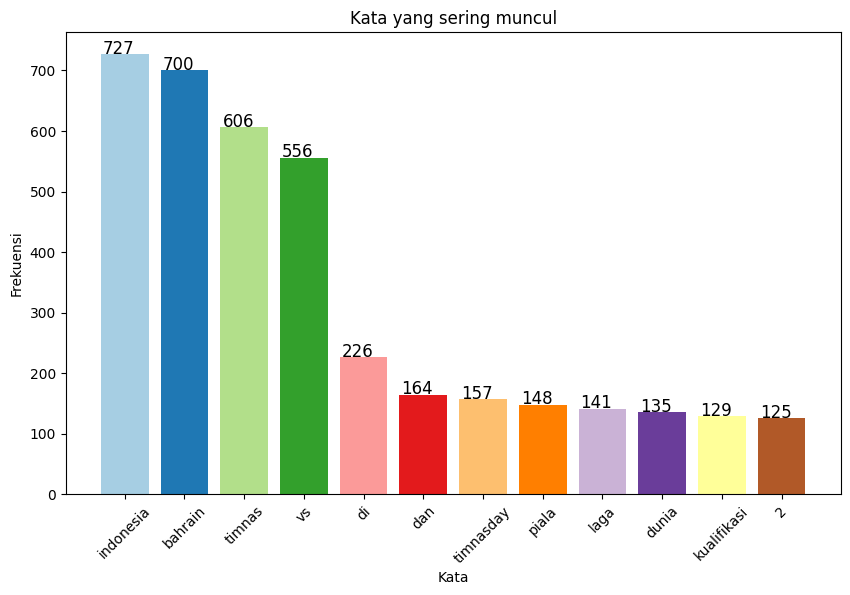

In [81]:
text = ' '.join(view['full_text'].astype(str).tolist())
words = text.split()

word_counts = Counter(words)
top_words = word_counts.most_common(12)

words, counts = zip(*top_words)

colors = plt.cm.Paired(range(len(words)))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(words, counts, color=colors)

ax.set_xlabel('Kata')
ax.set_ylabel('Frekuensi')
ax.set_title('Kata yang sering muncul')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=45)

for bar, num in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

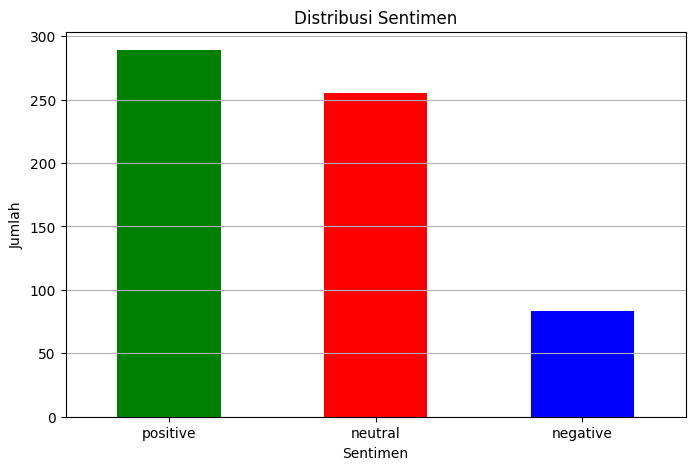

sentiment
positive    289
neutral     255
negative     83
Name: count, dtype: int64


In [82]:
sentiment_counts = view['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(sentiment_counts)